# Data Generated Analysis

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

GENERATED_ROOT_PATH = os.path.join("..", "input", "bugnet")
GENERATED_PAIRS_PATH = os.path.join(GENERATED_ROOT_PATH, "generated_pairs.csv")
CODEX_PAIRS_PATH = os.path.join(GENERATED_ROOT_PATH, "codex_results.csv")

In [2]:
df = pd.read_csv(GENERATED_PAIRS_PATH)

df.head()

,problem_id,language,original_status,original_src,changed_src,change,i1,i2,j1,j2,error
0,p00001,C++,Time Limit Exceeded,#include <stdio.h>\nint main(void) {\n int a ...,#include <stdio.h>\nint main(void) {\n int a ...,replace,3,4,3,4,TLE
1,p00001,C++,Runtime Error,#include <algorithm>\n#include <iostream>\nusi...,#include <algorithm>\n#include <iostream>\nusi...,replace,9,10,9,10,-11
2,p00001,C++,Runtime Error,#include <algorithm>\n#include <cstdio>\n\nusi...,#include <algorithm>\n#include <cstdio>\n\nusi...,replace,11,12,11,12,-11
3,p00001,C++,Time Limit Exceeded,#include <algorithm>\n#include <bitset>\n#incl...,#include <algorithm>\n#include <bitset>\n#incl...,replace,35,38,35,36,TLE
4,p00001,C++,Time Limit Exceeded,#include <iostream>\nusing namespace std;\n\ni...,#include <iostream>\nusing namespace std;\n\ni...,replace,19,20,19,20,TLE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62030 entries, 0 to 62029
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   problem_id       62030 non-null  object
 1   language         62030 non-null  object
 2   original_status  62030 non-null  object
 3   original_src     62030 non-null  object
 4   changed_src      62030 non-null  object
 5   change           62030 non-null  object
 6   i1               62030 non-null  int64 
 7   i2               62030 non-null  int64 
 8   j1               62030 non-null  int64 
 9   j2               62030 non-null  int64 
 10  error            62030 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.2+ MB


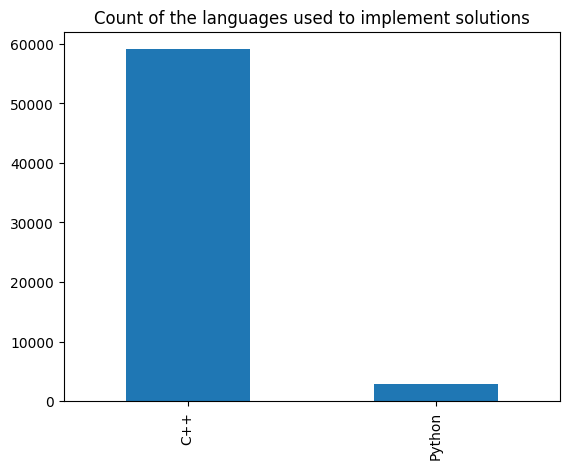

In [4]:
df["language"].value_counts().plot.bar()

plt.title("Count of the languages used to implement solutions")
plt.show()

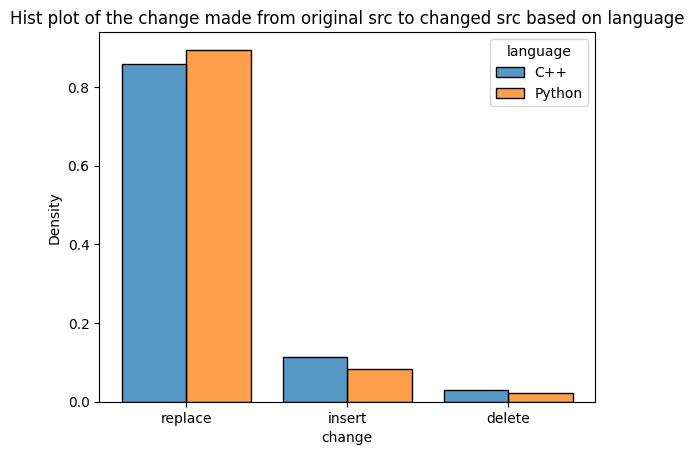

change
language change         
C++      delete     1692
         insert     6651
         replace   50750
Python   delete       64
         insert      245
         replace    2628

In [5]:
sns.histplot(x=df["change"], hue=df["language"], multiple="dodge", 
             stat="density", shrink=0.8, common_norm=False)

plt.title("Hist plot of the change made from original src to changed src based on language")
plt.show()

df.groupby(["language", "change"]).agg({"change": "count"})

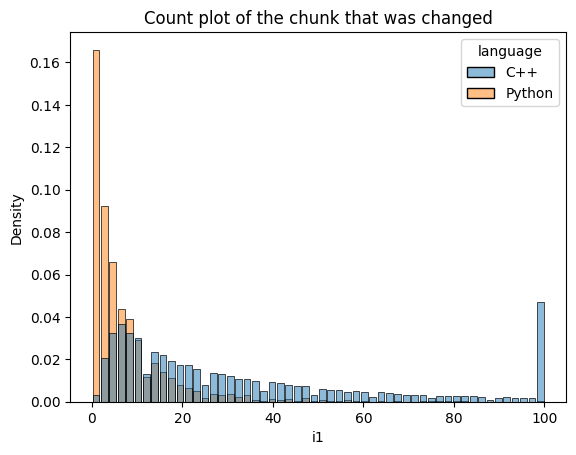

In [6]:
x = df["i1"].map(lambda line: line if line < 100 else 100)
sns.histplot(x=x, hue=df["language"], stat="density", shrink=0.8, common_norm=False)

plt.title("Count plot of the chunk that was changed")
plt.show()

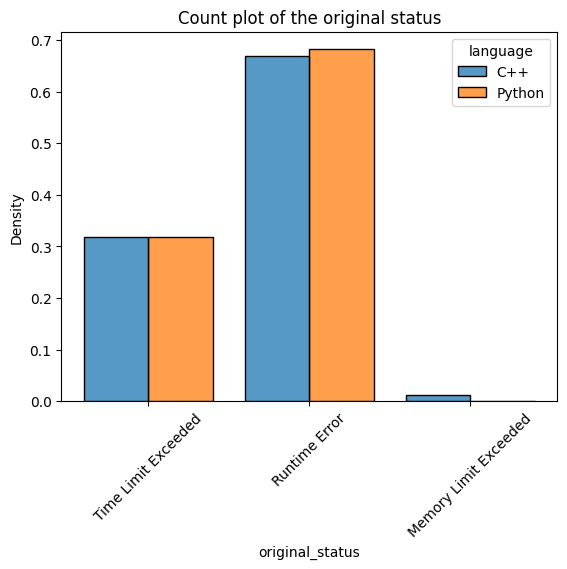

original_status
language original_status                       
C++      Memory Limit Exceeded              744
         Runtime Error                    39512
         Time Limit Exceeded              18837
Python   Memory Limit Exceeded                1
         Runtime Error                     2003
         Time Limit Exceeded                933

In [7]:
sns.histplot(x=df["original_status"], hue=df["language"], multiple="dodge", 
             stat="density", shrink=0.8, common_norm=False)

plt.title("Count plot of the original status")
plt.xticks(rotation=45)
plt.show()

df.groupby(["language", "original_status"]).agg({"original_status": "count"})